###Karla González Sánchez | A01541526

Resuleve el siguiente problema en Python

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.

Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos.

Pasos que debes de seguir para resolver el problema:

1.- Convierte los datos en un DataFrame. Esto te ayudará a realizar tus cálculos

2.- Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal. Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.

3.- Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales. Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.

4.- En caso de que no sean normales considera que tienen una distribución t-student.

5.- Calcula el intervalo de confianza de acuerdo con la distribución de los datos y el nivel de confianza solicitado.

In [16]:
import pandas as pd
import numpy as np

In [17]:
jugoA = [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23]
jugoB = [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]

In [18]:
r = np.mean(jugoA)
std_jugoA = np.std(jugoA)
std_jugoB = np.std(jugoB)

In [19]:
std_jugoA

1.9482185594936612

In [20]:
std_jugoB

1.6058919293927874

In [21]:
# Crear el DataFrame
data = {'jugoA': jugoA, 'jugoB': jugoB}
df = pd.DataFrame(data)
df

,jugoA,jugoB
0,20,19
1,25,18
2,22,21
3,23,20
4,28,23
5,26,22
6,24,20
7,21,19
8,27,22
9,25,21


In [23]:
# Estandarizar los datos manualmente usando la fórmula de t-student
jugoA_estandarizado = [(x - r) / (std_jugoA / np.sqrt(len(jugoA))) for x in jugoA]
jugoB_estandarizado = [(x - r) / (std_jugoB / np.sqrt(len(jugoB))) for x in jugoB]

##Gráfica QQ-plot

In [29]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [32]:
jugoA_stand = (jugoA - np.mean(jugoA)) / np.std(jugoA)
jugoB_stand = (jugoB - np.mean(jugoB)) / np.std(jugoB)

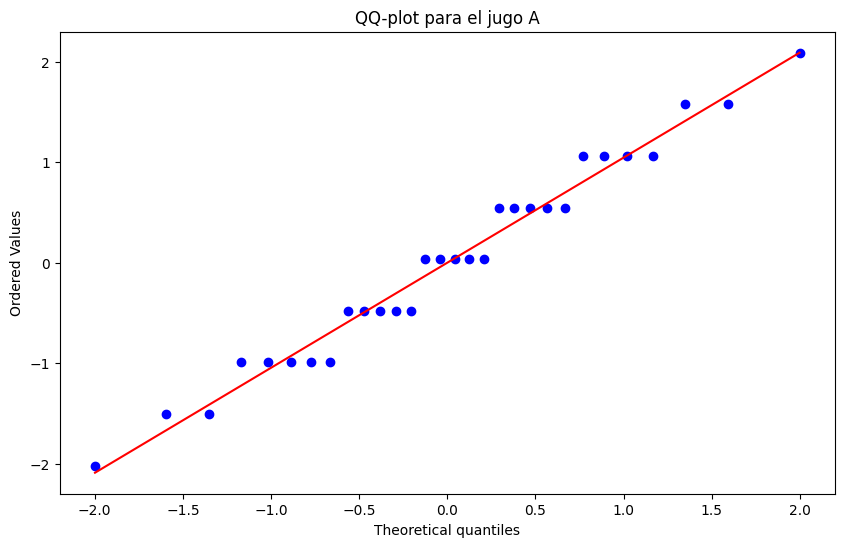

In [33]:
plt.figure(figsize=(10, 6))
stats.probplot(jugoA_stand, dist="norm", plot=plt)
plt.title("QQ-plot para el jugo A")
plt.show()

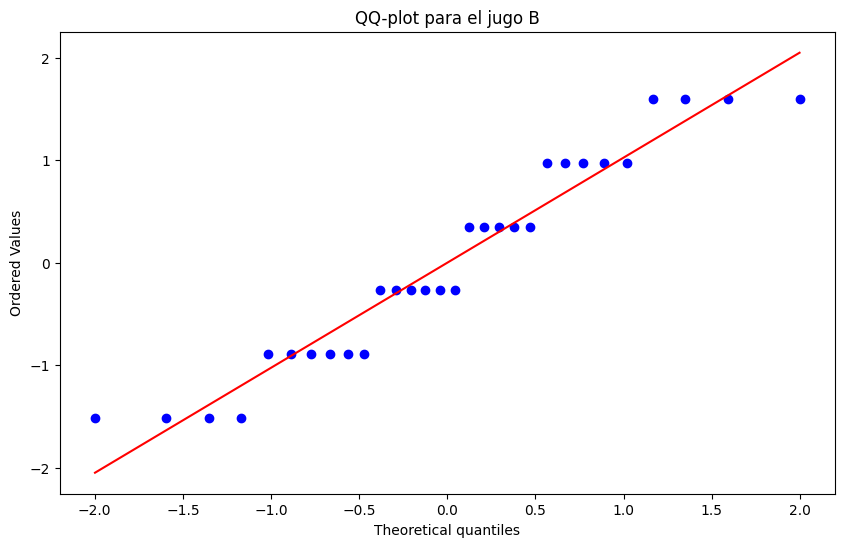

In [34]:
plt.figure(figsize=(10, 6))
stats.probplot(jugoB_stand, dist="norm", plot=plt)
plt.title("QQ-plot para el jugo B")
plt.show()

##test de Kolmogorov-Smirnov

In [35]:
kstest_result_A = stats.kstest(jugoA_stand, 'norm')
kstest_result_B = stats.kstest(jugoB_stand, 'norm')

print("Resultados del test de Kolmogorov-Smirnov para el jugo A:")
print(kstest_result_A)

print("Resultados del test de Kolmogorov-Smirnov para el jugo B:")
print(kstest_result_B)

Resultados del test de Kolmogorov-Smirnov para el jugo A:
KstestResult(statistic=0.11738896673840382, pvalue=0.7596266894154436, statistic_location=-0.4790701375804085, statistic_sign=1)
Resultados del test de Kolmogorov-Smirnov para el jugo B:
KstestResult(statistic=0.14728331185335664, pvalue=0.4878988806213048, statistic_location=-0.892546569977034, statistic_sign=1)


##Intervalo de confianza con distribución t-student

In [36]:
confidence_level = 0.99
alpha = 1 - confidence_level

n_A = len(jugoA)
n_B = len(jugoB)

mean_A = np.mean(jugoA)
mean_B = np.mean(jugoB)

std_A = np.std(jugoA, ddof=1)
std_B = np.std(jugoB, ddof=1)

t_critical = stats.t.ppf(1 - alpha / 2, df=min(n_A - 1, n_B - 1))

confidence_interval_A = (mean_A - t_critical * std_A / np.sqrt(n_A),
                         mean_A + t_critical * std_A / np.sqrt(n_A))

confidence_interval_B = (mean_B - t_critical * std_B / np.sqrt(n_B),
                         mean_B + t_critical * std_B / np.sqrt(n_B))

print(f"Intervalo de confianza del {confidence_level*100}% para el jugo A:", confidence_interval_A)
print(f"Intervalo de confianza del {confidence_level*100}% para el jugo B:", confidence_interval_B)


Intervalo de confianza del 99.0% para el jugo A: (22.936141535685323, 24.930525130981344)
Intervalo de confianza del 99.0% para el jugo B: (19.611360740938043, 21.255305925728624)
